In [2]:
import torch
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [31]:
def rle_decode(mask_rle, shape):
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    if np.isnan(mask_rle):
        return img.reshape(shape).T
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape).T

In [32]:
DATA_PATH = os.environ['DATA_PATH'] + 'airbus-ship-detection/'
label = pd.read_csv(DATA_PATH + 'train_ship_segmentations_v2.csv')
test_index = 12
image = cv2.imread(DATA_PATH + 'train_v2/' + label.ImageId[test_index])
# mask = np.zeros((image.shape[0] * image.shape[1]), dtype=np.uint8)
# print(mask.shape)
# gt = label.EncodedPixels[test_index].split()
# for i in range(0, len(gt), 2):
#     mask[int(gt[i]) : int(gt[i]) + int(gt[i + 1])] = 1
# mask = mask.reshape(image.shape[0:2]).T
# print(cv2.boundingRect(mask))
# x, y, w, h = cv2.boundingRect(mask)
# output = cv2.rectangle(image, (x, y), (x + w, y + h), (255, 255, 255), 3)
# plt.imshow(mask)
print(label.ImageId[test_index])
test = rle_decode(label.EncodedPixels[test_index], (768, 768))
plt.imshow(test)


00021ddc3.jpg


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

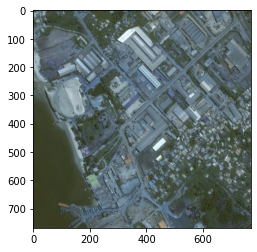

In [30]:
plt.imshow(image)